## Лабораторная работа №1 | Вариант 5

Выполнил: Кайдалова Александра Андреевна

### 1. Numpy

In [196]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [197]:
my_matrix = np.eye(3)
print(my_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


2. Создайте кастомный dtype который описывает цвет состоящий из 4х unsigned bytes(RGBA пиксель)

In [198]:
my_rgba = np.dtype([('r', np.uint8), 
                    ('g', np.uint8), 
                    ('b', np.uint8), 
                    ('a', np.uint8)])

colors = np.array([(255, 0, 0, 255),  # Красный
                   (0, 255, 0, 255),  # Зеленый
                   (0, 0, 255, 255)], # Синий
                  dtype = my_rgba)

3. Как игнорировать все numpy warnings(не рекомендуем к использованию)?

In [199]:
import warnings
warnings.filterwarnings('ignore')

4. Создайте случайный вектор размера 10 и отсортируйте его

In [200]:
my_vector = np.random.rand(10)
print("Начальный вектор:\n", my_vector)

sorted_vector = np.sort(my_vector)
print("\nОтсортированный вектор:\n", sorted_vector)

Начальный вектор:
 [0.00521835 0.66587745 0.50406734 0.68686418 0.90571751 0.57894845
 0.44325209 0.13137225 0.45763252 0.78116774]

Отсортированный вектор:
 [0.00521835 0.13137225 0.44325209 0.45763252 0.50406734 0.57894845
 0.66587745 0.68686418 0.78116774 0.90571751]


5. Создайте read-only массив(неизменяемый)

In [195]:
my_array = np.array([1, 2, 3, 4, 5])
my_array.setflags(write = False)

6. Рассмотрим случайную матрицу размером 10х2, представляющую декартовы координаты, преобразуем их в полярные координаты

In [215]:
cartesian_coord = np.random.rand(10, 2)
print("Декартовы координаты:\n", cartesian_coord)

x = cartesian_coord[:, 0]
y = cartesian_coord[:, 1]

r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

polar_coord = np.column_stack((r, theta))
print("\nПолярные координаты:\n", polar_coord)

Декартовы координаты:
 [[0.90109404 0.81735412]
 [0.70027737 0.31912649]
 [0.81647948 0.02588522]
 [0.07083101 0.00834875]
 [0.1093287  0.73001284]
 [0.71059415 0.82740467]
 [0.12224156 0.12386331]
 [0.06364056 0.97201424]
 [0.42850655 0.08245027]
 [0.46586498 0.69056941]]

Полярные координаты:
 [[1.21656822 0.73670671]
 [0.76956488 0.42759586]
 [0.81688971 0.03169283]
 [0.07132134 0.11732716]
 [0.73815412 1.42213846]
 [1.09066151 0.86120231]
 [0.1740262  0.79198773]
 [0.97409537 1.50541677]
 [0.43636672 0.19008993]
 [0.83301638 0.97731468]]


7. Создайте структурированный массив с координатами x и y, охватывающий область [0,1]x[0,1]

In [217]:
my_dtype = np.dtype([('x', np.float64), ('y', np.float64)])
my_array = np.zeros(10, dtype = my_dtype)

my_array['x'] = np.linspace(0, 1, 10)
my_array['y'] = np.linspace(0, 1, 10)

print(my_array)

[(0.        , 0.        ) (0.11111111, 0.11111111)
 (0.22222222, 0.22222222) (0.33333333, 0.33333333)
 (0.44444444, 0.44444444) (0.55555556, 0.55555556)
 (0.66666667, 0.66666667) (0.77777778, 0.77777778)
 (0.88888889, 0.88888889) (1.        , 1.        )]


8. Учитывая два массива X и Y, постройте матрицу Коши $C$ ($C_{ij} =\frac{1}{x_i - y_j}$)

In [218]:
x = np.random.normal(size=(5))
y = np.random.normal(size=(5))

diff = x[:, np.newaxis] - y[np.newaxis, :]
C = np.where(diff == 0, np.inf, 1 / diff)

print(C)

[[ 0.83911755 -4.71499474  0.33255734 20.26125095  1.25062466]
 [ 1.08402318 -2.07758552  0.3652619  -4.54786592  1.88550542]
 [-0.73817405 -0.36251435  2.17118495 -0.40046984 -0.57246824]
 [ 0.65763776  8.56336765  0.29977223  2.64395617  0.88615856]
 [ 5.56360027 -0.81694158  0.50125017 -1.03881736 -4.70836391]]


9. Как конвертировать массив float(32 bit) к массиву целых чисел (integer 32 bit) in place?

In [219]:
my_array = np.array([1.2, 3.4, 5.6, 7.8, 9.3], dtype = np.float32)
print("Массив float:\n", my_array, my_array.dtype)

my_array = my_array.astype(np.int32)
print("\nМассив integer:\n", my_array, my_array.dtype)


Массив float:
 [1.2 3.4 5.6 7.8 9.3] float32

Массив integer:
 [1 3 5 7 9] int32


10. Как случайно заменить p элементов в 2D массиве?

In [221]:
my_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("Исходный массив:\n", my_array)

p = 3
rows = np.random.choice(my_array.shape[0], p, replace = False)
cols = np.random.choice(my_array.shape[1], p, replace = False)

my_array[rows, cols] = np.random.randint(10, size = p)
print("\nПолученный массив:\n", my_array)


Исходный массив:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Полученный массив:
 [[5 2 3]
 [4 0 6]
 [7 8 5]]


### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Классический начальный набор данных - данные пассажиров титаника.

Файл: `data.csv`

```
PassangerId - уникальный номер пассажира
Survived - выжил человек или нет
Pclass - класс обслуживания
Name - имя человека, обращение к ней/нему
Sex - пол человека
Age - возраст на момент крушения
SibSp - количество братьев и сестер / супругов на борту "Титаника"
Parch - количество родителей / детей на борту "Титаника"
Ticket - номер билета
Fare - стоимость проезда для пассажиров
Cabin - каюта
Embarked - причал отбытия. C = Cherbourg Q = Queenstown S = Southampton
```

In [222]:
import pandas as pd

In [307]:
data = pd.read_csv('data.csv')

median_age = data['Age'].median(skipna = True) # Так как в поле Age есть пропуски (около 15 %) заполняю их медианным значением.
data['Age'].fillna(median_age, inplace = True)

1. Узнайте сколько было на борту человек

In [308]:
passenger_ids = data['PassengerId'].nunique()
print("Общее количество человек на борту:", passenger_ids)

Общее количество человек на борту: 891


2. Какой медианный и средний возраста пассажиров

In [309]:
median_age = data['Age'].median(skipna = True)
mean_age = data['Age'].mean(skipna = True)

print("Медианный возраст пассажиров:", median_age)
print("Средний возраст пассажиров:", mean_age, "\n")

Медианный возраст пассажиров: 28.0
Средний возраст пассажиров: 29.36158249158249 



3. Посчитайте процент выживаемости детей(до 16 лет) и взрослых

In [285]:
data['Category'] = data['Age'].apply(lambda x: 'Child' if x < 16 else 'Adult')
survival_rate = data.groupby('Category')['Survived'].mean() * 100

print(f"Процент выживаемости детей: {survival_rate.get('Child', 0):.6f} %")
print(f"Процент выживаемости взрослых: {survival_rate.get('Adult', 0):.6f} %\n")

Процент выживаемости детей: 59.036145 %
Процент выживаемости взрослых: 36.262376 %



4. Верна ли гипотеза, что женщины и дети сажались в шлюпки первыми и выживали больше?

In [294]:
data['Category'] = data.apply(lambda x: 'Child' if x['Age'] < 16 else ('Woman' if x['Sex'] == 'female' else 'Man'), axis = 1)
survival_rate = data.groupby('Category')['Survived'].mean() * 100

print(survival_rate)
print("\nТак как процент выживаемости у детей и женщин больше, чем у мужчин, мы можем утвержать, что гипотеза верна.\n")

Category
Child    59.036145
Man      16.387337
Woman    75.645756
Name: Survived, dtype: float64

Так как процент выживаемости у детей и женщин больше, чем у мужчин, мы можем утвержать, что гипотеза верна.



5. Зависит ли выживаемость от класса обслуживания?

In [295]:
survival_rate = data.groupby('Pclass')['Survived'].mean() * 100

print(survival_rate)
print("\nПо таблице видно, что у первого класса самый большой процент выживаемости, а у третьего класса самый низкий, следовательно, мы можем утверждать,\nчто выживаемость зависит от класса обслуживания.\n")

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

По таблице видно, что у первого класса самый большой процент выживаемости, а у третьего класса самый низкий, следовательно, мы можем утверждать,
что выживаемость зависит от класса обслуживания.



6. Посчитайте средний возраст умерших женщин и мужчин

In [296]:
female_age = data[(new_data['Sex'] == 'female') & (data['Survived'] == 0)]['Age'].mean()
male_age = data[(data['Sex'] == 'male') & (data['Survived'] == 0)]['Age'].mean()

print(f"Средний возраст умерших женщин: {female_age:.2f}")
print(f"Средний возраст умерших мужчин: {male_age:.2f}\n")

Средний возраст умерших женщин: 25.05
Средний возраст умерших мужчин: 30.78



7. Различается ли процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек?

In [297]:
data['Has_Relatives'] = (data['SibSp'] > 0) | (data['Parch'] > 0)
survival_rate = data.groupby('Has_Relatives')['Survived'].mean() * 100

print(f"Процент выживаемости одиночек: {survival_rate[False]:.6f} %")
print(f"Процент выживаемости пассажиров с родственниками: {survival_rate[True]:.6f} %\n")
print("Из данных выше видно, что  процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек различается.\n")

Процент выживаемости одиночек: 30.353818 %
Процент выживаемости пассажиров с родственниками: 50.564972 %

Из данных выше видно, что  процент выживаемости пассажиров с хотя бы одним родственником на борту и одиночек различается.



8. Различается ли средняя стоимость билета у умерших и выживших пассажиров?

In [298]:
survived = data[data['Survived'] == 1]['Fare'].mean()
died = data[data['Survived'] == 0]['Fare'].mean()

print(f"Средняя стоимость билета у выживших: {survived:.6f}")
print(f"Средняя стоимость билета у умерших: {died:.6f}\n")

Средняя стоимость билета у выживших: 48.395408
Средняя стоимость билета у умерших: 22.117887



9. Выведите максимальный и минимальный возраст выживших пассажиров во 2 классе обслуживания

In [299]:
second_class_survivors = data[(data['Pclass'] == 2) & (data['Survived'] == 1)]

max_age = second_class_survivors['Age'].max()
min_age = second_class_survivors['Age'].min()

print(f'Максимальный возраст выживших пассажиров во 2 классе: {max_age:.2f}')
print(f'Минимальный возраст выживших пассажиров во 2 классе: {min_age:.2f}\n')

Максимальный возраст выживших пассажиров во 2 классе: 62.00
Минимальный возраст выживших пассажиров во 2 классе: 0.67



10. Подтвердите или опровергните гипотезу: молодым мужчинам(от 18 лет) выжить легче, чем более взрослым

In [300]:
print("Считаю взрослых мужчин с 35 лет.\n")

young_men = data[(data['Sex'] == 'male') & (data['Age'] >= 18) & (data['Age'] < 35)]
older_men = data[(data['Sex'] == 'male') & (data['Age'] >= 35)]

young_survival_rate = young_men['Survived'].mean() * 100
older_survival_rate = older_men['Survived'].mean() * 100

print(f"Процент выживаемости молодых мужчин: {young_survival_rate:.6f} %")
print(f"Процент выживаемости более старших мужчин: {older_survival_rate:.6f} %\n")
print("Из данных выше видно, что процент выживаемости более старших мужчин выше, поэтому можно утверждать, что гипотеза не верна. \n")

Считаю взрослых мужчин с 35 лет.

Процент выживаемости молодых мужчин: 15.616438 %
Процент выживаемости более старших мужчин: 18.831169 %

Из данных выше видно, что процент выживаемости более старших мужчин выше, поэтому можно утверждать, что гипотеза не верна. 



### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Постройте гистограмму распределения возростов пассажиров

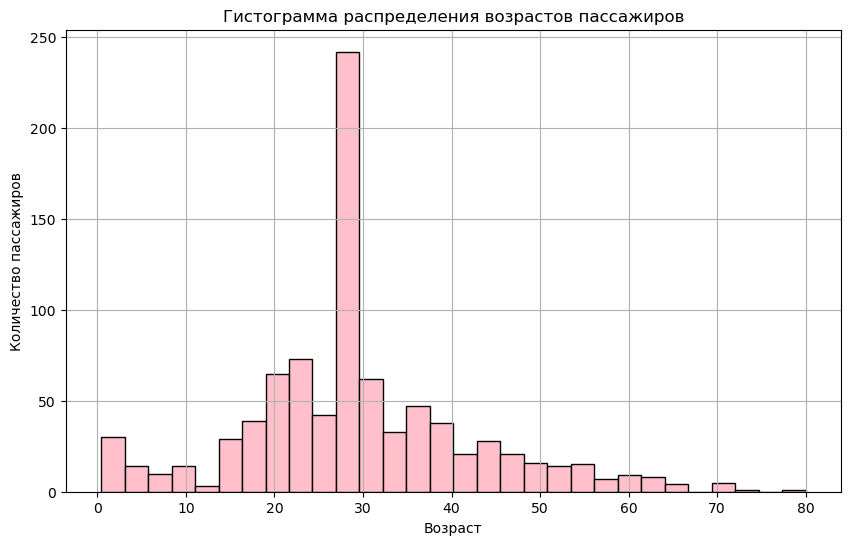

In [315]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 6))
plt.hist(data['Age'], bins = 30, edgecolor = 'black', color = 'pink')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Гистограмма распределения возрастов пассажиров')

plt.grid()
plt.show()

2. Постройте гистограммы распределения цен для пассажиров разных классов

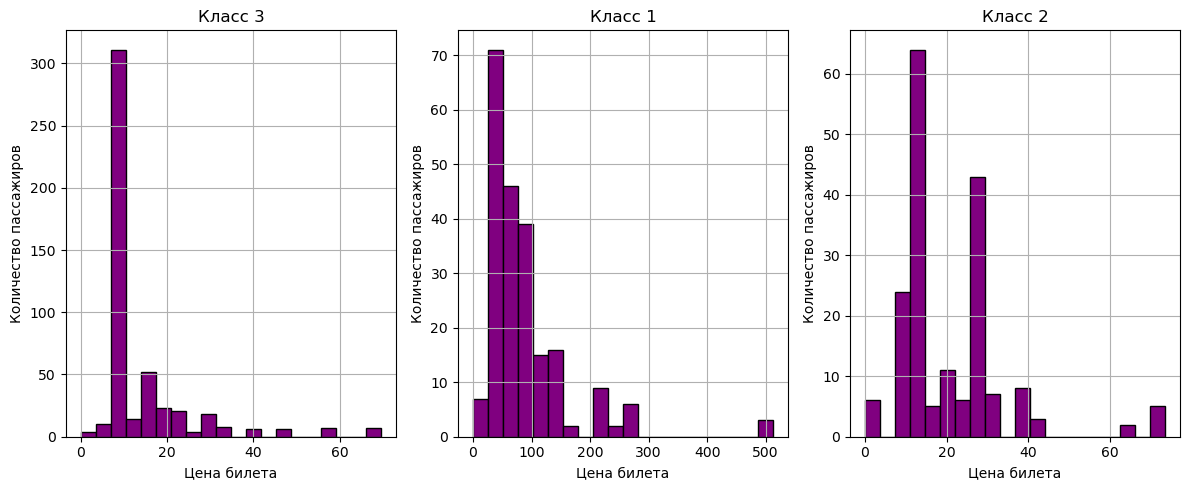

In [312]:
plt.figure(figsize=(12, 5))

for i, my_class in enumerate(data['Pclass'].unique()):
    plt.subplot(1, 3, i + 1)
    data_class = data[data['Pclass'] == my_class]
    plt.hist(data_class['Fare'], bins = 20, edgecolor = 'black', color = 'purple')
    plt.xlabel('Цена билета')
    plt.ylabel('Количество пассажиров')
    plt.title(f'Класс {my_class}')
    plt.grid()

plt.tight_layout()
plt.show()

3. Постройте зависимость цены от возраста пассажира

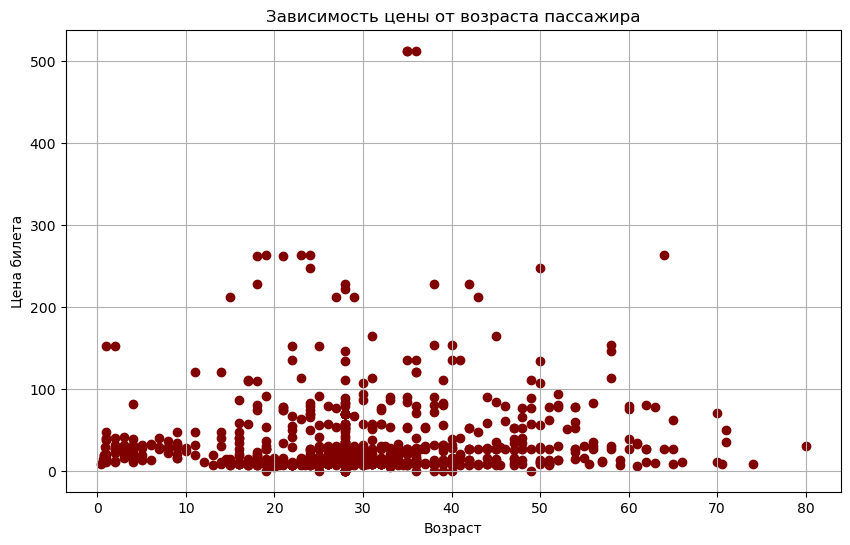

In [316]:
plt.figure(figsize = (10, 6))
plt.scatter(data['Age'], data['Fare'], color = 'maroon')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.title('Зависимость цены от возраста пассажира')

plt.grid()
plt.show()

4. Постройте box plot отображающий распределение цен на билеты в разных классах

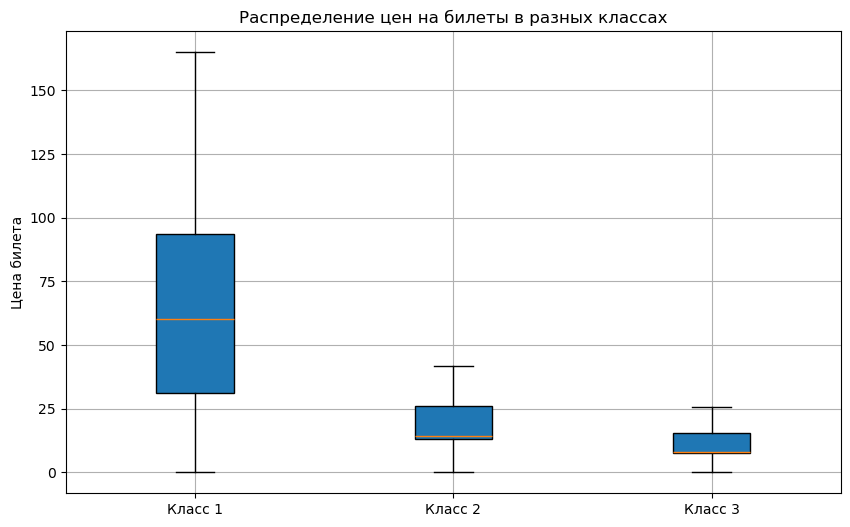

In [317]:
plt.figure(figsize = (10, 6))

plt.boxplot(
    [data[data['Pclass'] == 1]['Fare'],
     data[data['Pclass'] == 2]['Fare'],
     data[data['Pclass'] == 3]['Fare']],
    labels = ['Класс 1', 'Класс 2', 'Класс 3'], patch_artist = True, showfliers = False
)
plt.ylabel('Цена билета')
plt.title('Распределение цен на билеты в разных классах')

plt.grid()
plt.show()

5. Визуализируйте распределение долей выживших среди мужчин, женщин и детей(до 16 лет)

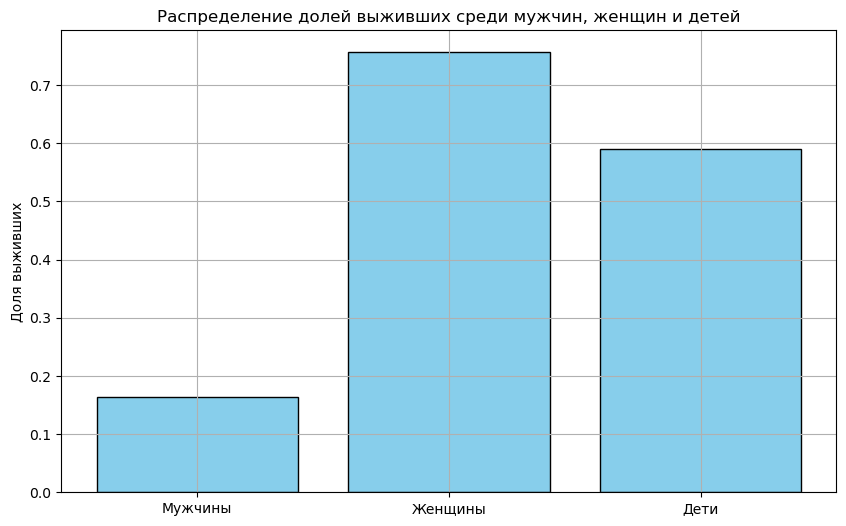

In [318]:
data['Category'] = 'Дети'
data.loc[(data['Age'] >= 16) & (data['Sex'] == 'female'), 'Category'] = 'Женщины'
data.loc[(data['Age'] >= 16) & (data['Sex'] == 'male'), 'Category'] = 'Мужчины'

plt.figure(figsize=(10, 6))
plt.bar(data['Category'].unique(), [data[data['Category'] == i]['Survived'].mean() for i in data['Category'].unique()], edgecolor = 'black', color='skyblue')
plt.ylabel('Доля выживших')
plt.title('Распределение долей выживших среди мужчин, женщин и детей')

plt.grid()
plt.show()

6. Сравните плотности распределения возростов выживших и умерших пассажиров, сделайте выводы

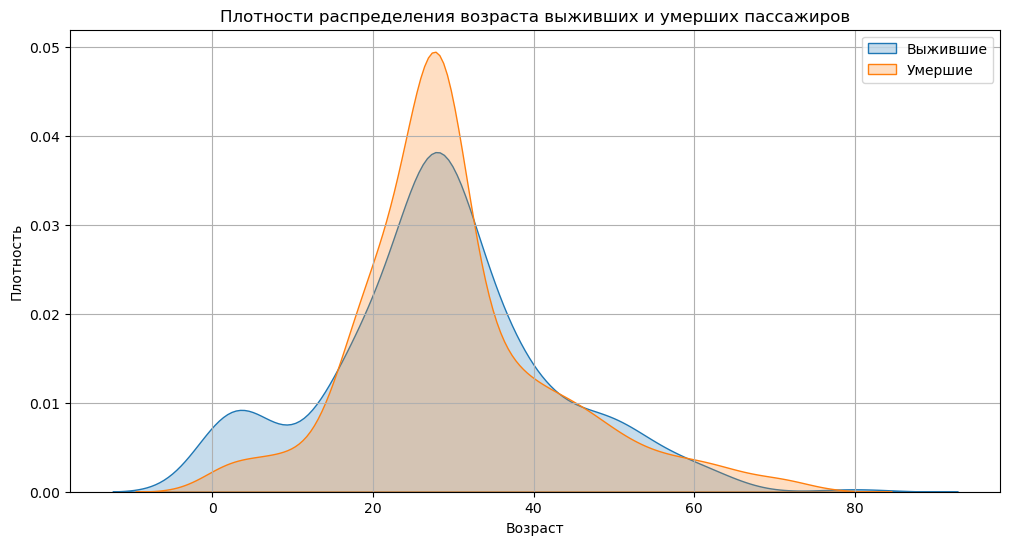

Проанализировав полученный график, можно сделать следующие выводы:
 - Дети примерно до 10 лет имели больше шансов выжить
 - Пик смертности пришелся на возраст примерно 30 лет 
 - Пик выживаемости пришелся на возраст примерно 30 лет


In [320]:
survived = data[data['Survived'] == 1]
not_survived = data[data['Survived'] == 0]

plt.figure(figsize = (12, 6))
sns.kdeplot(survived['Age'], label = 'Выжившие', fill = True)
sns.kdeplot(not_survived['Age'], label = 'Умершие', fill = True)

plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Плотности распределения возраста выживших и умерших пассажиров')

plt.legend()
plt.grid()
plt.show()
print('Проанализировав полученный график, можно сделать следующие выводы:\n - Дети примерно до 10 лет имели больше шансов выжить\n - Пик смертности пришелся на возраст примерно 30 лет \n - Пик выживаемости пришелся на возраст примерно 30 лет')

7. Постройте круговую диаграмму отображающую выживаемость мужчин и женщин в разных классах обслуживания(визуализация должна быть интуитивно понятная без объяснений, женщины и мужчины соответствующих классов объеденены визуально в одну группу и 2 подгруппы)*

\* Задание на доп. балл

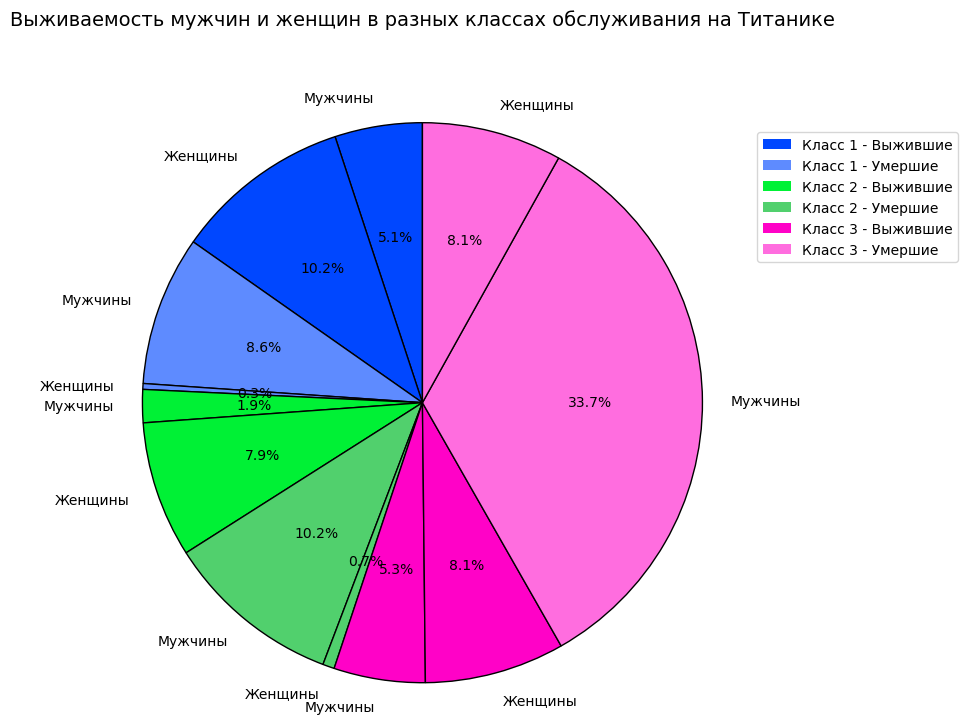

In [322]:
data = data.dropna(subset = ['Age'])
survival_counts = data.groupby(['Pclass', 'Sex', 'Survived']).size().unstack(fill_value = 0)

sizes = [
    survival_counts.loc[1, 'male'][1],
    survival_counts.loc[1, 'female'][1],
    survival_counts.loc[1, 'male'][0],
    survival_counts.loc[1, 'female'][0],
    survival_counts.loc[2, 'male'][1],
    survival_counts.loc[2, 'female'][1],
    survival_counts.loc[2, 'male'][0],
    survival_counts.loc[2, 'female'][0],
    survival_counts.loc[3, 'male'][1],
    survival_counts.loc[3, 'female'][1],
    survival_counts.loc[3, 'male'][0],
    survival_counts.loc[3, 'female'][0]
]

labels = [
    'Мужчины', 'Женщины',
    'Мужчины', 'Женщины',
    'Мужчины', 'Женщины',
    'Мужчины', 'Женщины',
    'Мужчины', 'Женщины',
    'Мужчины', 'Женщины'
]

colors = ['#0047FF', '#0047FF', '#5E8BFF', '#5E8BFF',
          '#00F135', '#00F135', '#51D06D', '#51D06D',
          '#FF02C7', '#FF02C7', '#FF6DDF', '#FF6DDF']

fig, ax = plt.subplots(figsize = (10, 8))
wedges, texts, autotexts = ax.pie(sizes, labels = labels, autopct = '%2.1f%%', startangle = 90, colors = colors)
for wedge in wedges:
    wedge.set_edgecolor('black')

ax.axis('equal') 
plt.title('Выживаемость мужчин и женщин в разных классах обслуживания на Титанике', fontsize = 14, y = 1.1)

legend_elements = [
   plt.Rectangle((0, 0), 1, 1, fc = '#0047FF', label = 'Класс 1 - Выжившие'),
    plt.Rectangle((0, 0), 1, 1, fc = '#5E8BFF', label = 'Класс 1 - Умершие'),
    plt.Rectangle((0, 0), 1, 1, fc = '#00F135', label = 'Класс 2 - Выжившие'),
    plt.Rectangle((0, 0), 1, 1, fc = '#51D06D', label = 'Класс 2 - Умершие'),
    plt.Rectangle((0, 0), 1, 1, fc = '#FF02C7', label = 'Класс 3 - Выжившие'),
    plt.Rectangle((0, 0), 1, 1, fc = '#FF6DDF', label = 'Класс 3 - Умершие'),
]
plt.legend(handles = legend_elements, bbox_to_anchor = (1.2, 0.95))

plt.show()